In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from wordcloud import WordCloud
import warnings
import re

warnings.filterwarnings("ignore")

In [3]:
df_articles = pd.read_csv("data/cleaned_article.csv")
df_articles.head()

,Kategori,Link,article_title,article_text,domain,cleaned_article_text,polarity,subjectivity,tokens,tokens_no_stop,tokens_final,tokens_stemmed,text_final,sentiment_label
0,Finance,https://industri.kontan.co.id/news/pemerintah-...,"Pemerintah Resmi Turunkan Harga Tiket Pesawat,...",Reporter: Leni Wandira | Editor: Wahyu T.Rahma...,kontan,kontancoid jakarta lion group mendukung penuh...,0.089297,0.302210,"['kontancoid', 'jakarta', 'lion', 'group', 'me...","['kontancoid', 'jakarta', 'lion', 'group', 'me...","['kontancoid', 'jakarta', 'lion', 'group', 'me...","['kontancoid', 'jakarta', 'lion', 'group', 'du...",kontancoid jakarta lion group dukung penuh bij...,Positive
1,Incident,https://news.okezone.com/read/2023/10/29/337/2...,Peristiwa 29 Oktober : Pesawat Lion Air Jatuh ...,SEJUMLAH peristiwa terjadi pada 29 Oktober. Sa...,okezone,sejumlah peristiwa terjadi pada oktober salah...,0.163492,0.307937,"['sejumlah', 'peristiwa', 'terjadi', 'pada', '...","['peristiwa', 'oktober', 'salah', 'satunya', '...","['peristiwa', 'oktober', 'salah', 'satunya', '...","['peristiwa', 'oktober', 'salah', 'satu', 'jat...",peristiwa oktober salah satu jatuh pesawat lio...,Positive
2,Incident,https://www.cnnindonesia.com/ekonomi/202306081...,Deret Masalah Penerbangan Lion Air Group Sepan...,Sekretaris Umum PP Muhammadiyah Abdul Mu'ti me...,cnnindonesia,sekretaris umum pp muhammadiyah abdul muti men...,0.073193,0.327077,"['sekretaris', 'umum', 'pp', 'muhammadiyah', '...","['sekretaris', 'pp', 'muhammadiyah', 'abdul', ...","['sekretaris', 'pp', 'muhammadiyah', 'abdul', ...","['sekretaris', 'pp', 'muhammadiyah', 'abdul', ...",sekretaris pp muhammadiyah abdul muti kritik p...,Positive
3,Incident,https://www.antaranews.com/video/3366141/ini-d...,Ini dugaan penyebab kecelakaan pesawat Lion Ai...,Copyright © ANTARA 2023\nDilarang keras mengam...,antaranews,dilarang keras mengambil konten melakukan craw...,0.000000,0.000000,"['dilarang', 'keras', 'mengambil', 'konten', '...","['dilarang', 'keras', 'mengambil', 'konten', '...","['dilarang', 'keras', 'mengambil', 'konten', '...","['larang', 'keras', 'ambil', 'konten', 'crawli...",larang keras ambil konten crawling indeks otom...,Netral
4,Operational,https://haji.kemenag.go.id/v5/detail/tingkatka...,"Tingkatkan Kualitas Layanan, Kemenag - Lion Ai...",21 Feb 2025 oleh Husni Anggoro | dilihat 42259...,kemenag,feb oleh husni anggoro dilihat kali\njakar...,0.140405,0.389091,"['feb', 'oleh', 'husni', 'anggoro', 'dilihat',...","['feb', 'husni', 'anggoro', 'kali', 'jakarta',...","['feb', 'husni', 'anggoro', 'kali', 'jakarta',...","['feb', 'husni', 'anggoro', 'kali', 'jakarta',...",feb husni anggoro kali jakarta phu direktorat ...,Positive


### Non-Alphanumeric Cleaning

In [4]:
# Cleaning function to remove non-alphanumeric characters
def clean_text(text):
    if isinstance(text, str):
        return re.sub(r"[^a-zA-Z0-9\s]", "", text)
    else:
        return ""


# Apply cleaning function to the 'clean_ready' column
df_articles["cleaned_article_text"] = df_articles["cleaned_article_text"].apply(clean_text)

### BoW and TF-IDF Vectorization

In [ ]:
vec_params = {'max_df': 0.75, 'min_df': 2, 'ngram_range': (1, 2)}

# tfidf
tfidf_vectorizer = TfidfVectorizer(**vec_params)
tfidf_mat = tfidf_vectorizer.fit_transform(df_articles['cleaned_article_text'])
tfidf_dense = tfidf_mat.toarray()
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(
    tfidf_dense, columns=tfidf_feature_names
)

# agglomerative

print(f"TF-IDF matrix shape: {tfidf_mat.shape}")


TF-IDF matrix shape: (153, 8718)


In [8]:
term_importance = pd.Series(
    tfidf_mat.sum(axis=0).flatten().tolist()[0],
    index=tfidf_vectorizer.get_feature_names_out(),
)

print("\n--- TOP 20 MOST IMPORTANT TERMS OVERALL ---")
print(term_importance.sort_values(ascending=False).head(20))




--- TOP 20 MOST IMPORTANT TERMS OVERALL ---
bandara         5.770682
tidak           4.256658
danang          4.086961
tersebut        3.796222
udara           3.537932
ada             3.497312
saat            3.489786
jt              3.457417
bagasi          3.440074
group           3.194688
maskapai        3.080745
pukul           3.064251
akan            3.018420
pesawat lion    2.986309
indonesia       2.893809
merauke         2.881643
bom             2.822931
kata            2.807089
kepada          2.793974
haji            2.783686
dtype: float64


In [9]:
# bow
bow_vectorizer = CountVectorizer(**vec_params)
X_bow = bow_vectorizer.fit_transform(df_articles['cleaned_article_text'])
X_bow_dense = X_bow.toarray()
bow_feature_names = bow_vectorizer.get_feature_names_out()

print(f"BoW matrix shape: {X_bow.shape}")

BoW matrix shape: (153, 8718)


### Clustering on TF-IDF

In [13]:
documents = df_articles["cleaned_article_text"]

In [55]:
num_clusters = 3

# K-Means
kmeans_tfidf = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans_tfidf.fit(tfidf_mat)
kmeans_cluster_labels = kmeans_tfidf.labels_
df_articles['kmeans_tfidf'] = kmeans_tfidf.fit_predict(tfidf_mat)

silhouette_tfidf_kmeans = silhouette_score(tfidf_mat, kmeans_cluster_labels)
calinski_harabasz_tfidf_kmeans = calinski_harabasz_score(tfidf_dense, kmeans_cluster_labels)
davies_bouldin_tfidf_kmeans = davies_bouldin_score(tfidf_dense, kmeans_cluster_labels)

# Agglomerative
agglomerative = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
agglomerative.fit(tfidf_dense)
agglomerative_cluster_labels = agglomerative.labels_
df_articles['agg_tfidf'] = agglomerative.fit_predict(tfidf_dense)

silhouette_tfidf_agglomerative = silhouette_score(tfidf_mat, agglomerative_cluster_labels)
calinski_harabasz_tfidf_agglomerative = calinski_harabasz_score(tfidf_dense, agglomerative_cluster_labels)
davies_bouldin_tfidf_agglomerative = davies_bouldin_score(tfidf_dense, agglomerative_cluster_labels)


print(f'TF-IDF Kmeans Clustering Performance:\nSilhouette Score: {silhouette_tfidf_kmeans}\nCalinski-Harabasz Score: {calinski_harabasz_tfidf_kmeans}\nDavies-Bouldin Score: {davies_bouldin_tfidf_kmeans}\n')
print(f'TF-IDF Agglomerative Clustering Performance:\nSilhouette Score: {silhouette_tfidf_agglomerative}\nCalinski-Harabasz Score: {calinski_harabasz_tfidf_agglomerative}\nDavies-Bouldin Score: {davies_bouldin_tfidf_agglomerative}\n')


TF-IDF Kmeans Clustering Performance:
Silhouette Score: 0.023743169997377144
Calinski-Harabasz Score: 3.961060195806458
Davies-Bouldin Score: 5.136185996803626

TF-IDF Agglomerative Clustering Performance:
Silhouette Score: 0.025761523302756054
Calinski-Harabasz Score: 4.164640408298495
Davies-Bouldin Score: 4.0138490021842115



### Clustering on BoW

In [37]:

num_clusters = 3

# K-Means
kmeans_bow = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans_bow.fit(X_bow_dense)
kmeans_cluster_labels = kmeans_bow.labels_
df_articles['kmeans_bow'] = kmeans_bow.fit_predict(X_bow_dense)

silhouette_bow_kmeans = silhouette_score(X_bow, kmeans_cluster_labels)
calinski_harabasz_bow_kmeans = calinski_harabasz_score(X_bow_dense, kmeans_cluster_labels)
davies_bouldin_bow_kmeans = davies_bouldin_score(X_bow_dense, kmeans_cluster_labels)

# Agglomerative
agglomerative_bow = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
agglomerative_bow.fit(X_bow_dense)
agglomerative_cluster_labels = agglomerative_bow.labels_
df_articles['agg_bow'] = agglomerative_bow.fit_predict(X_bow_dense)

silhouette_bow_agglomerative = silhouette_score(X_bow, agglomerative_cluster_labels)
calinski_harabasz_bow_agglomerative = calinski_harabasz_score(X_bow_dense, agglomerative_cluster_labels)
davies_bouldin_bow_agglomerative = davies_bouldin_score(X_bow_dense, agglomerative_cluster_labels)


print(f'BoW Kmeans Clustering Performance:\nSilhouette Score: {silhouette_bow_kmeans}\nCalinski-Harabasz Score: {calinski_harabasz_bow_kmeans}\nDavies-Bouldin Score: {davies_bouldin_bow_kmeans}\n')
print(f'BoW Agglomerative Clustering Performance:\nSilhouette Score: {silhouette_bow_agglomerative}\nCalinski-Harabasz Score: {calinski_harabasz_bow_agglomerative}\nDavies-Bouldin Score: {davies_bouldin_bow_agglomerative}\n')


BoW Kmeans Clustering Performance:
Silhouette Score: 0.14664531175538198
Calinski-Harabasz Score: 15.137710184725044
Davies-Bouldin Score: 2.9136953402560875

BoW Agglomerative Clustering Performance:
Silhouette Score: 0.5213313502317253
Calinski-Harabasz Score: 15.481891862438308
Davies-Bouldin Score: 0.4014368969452793



### Dendogram Visualization

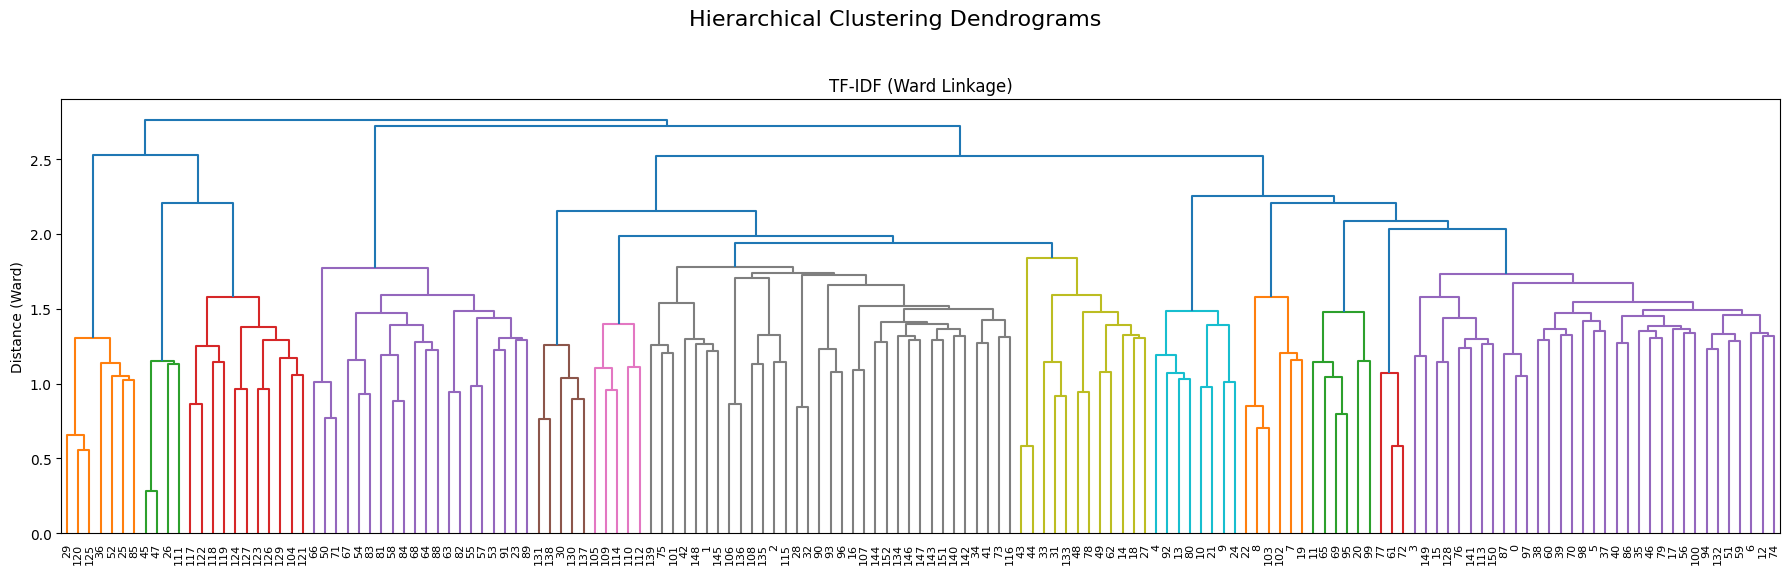

In [38]:
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
fig.suptitle('Hierarchical Clustering Dendrograms', fontsize=16)

# TF-IDF Dendrogram
Z_tfidf = linkage(tfidf_dense, method='ward')
dendrogram(Z_tfidf, leaf_rotation=90., leaf_font_size=8., ax=axes)
axes.set_title('TF-IDF (Ward Linkage)')
axes.set_ylabel('Distance (Ward)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

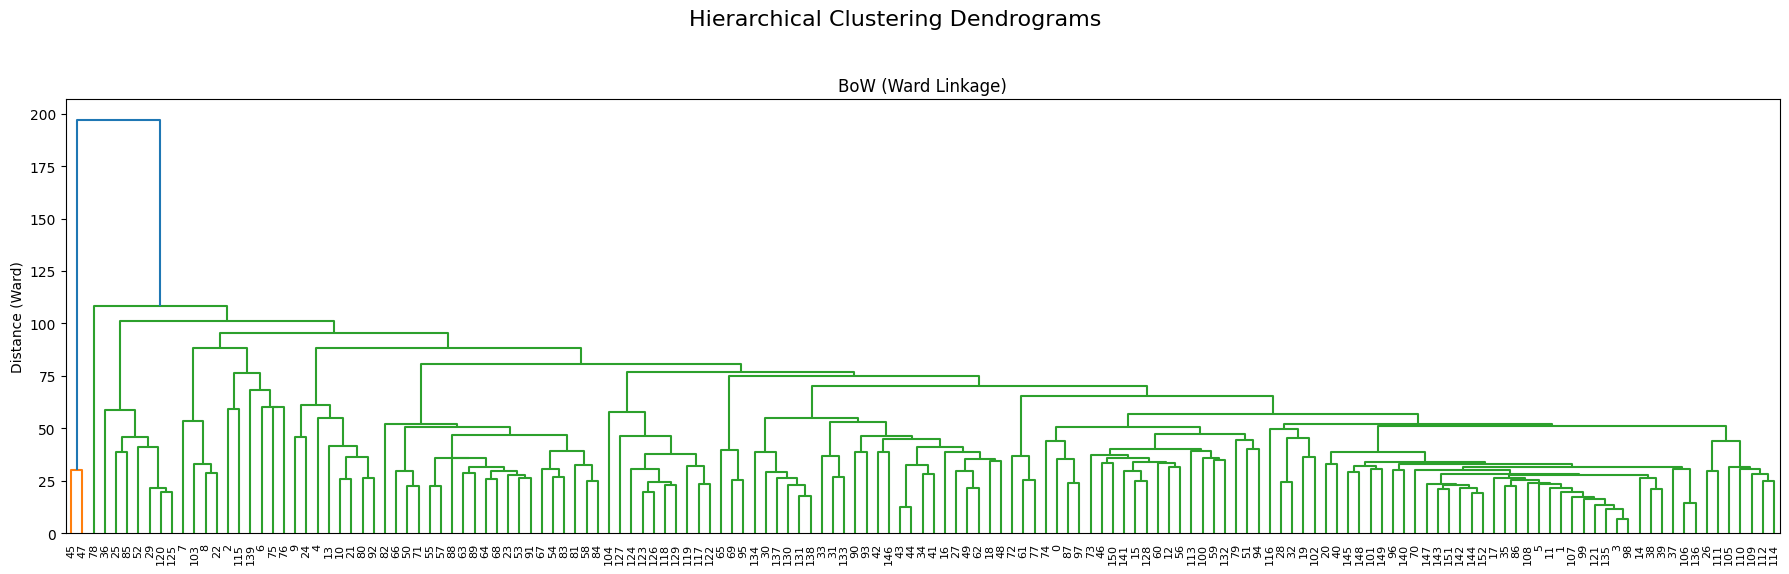

In [39]:
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
fig.suptitle('Hierarchical Clustering Dendrograms', fontsize=16)

# BoW Dendrogram
Z_bow = linkage(X_bow_dense, method='ward')
dendrogram(Z_bow, leaf_rotation=90., leaf_font_size=8., ax=axes)
axes.set_title('BoW (Ward Linkage)')
axes.set_ylabel('Distance (Ward)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### PCA Cluster Plots

In [40]:
# PCA on TF-IDF
pca_tfidf = PCA(n_components=2, random_state=42)
X_pca_tfidf = pca_tfidf.fit_transform(tfidf_dense)
df_articles['PCA1_tfidf'] = X_pca_tfidf[:, 0]
df_articles['PCA2_tfidf'] = X_pca_tfidf[:, 1]
# PCA on BoW
pca_bow = PCA(n_components=2, random_state=42)
X_pca_bow = pca_bow.fit_transform(X_bow_dense)
df_articles['PCA1_bow'] = X_pca_bow[:, 0]
df_articles['PCA2_bow'] = X_pca_bow[:, 1]

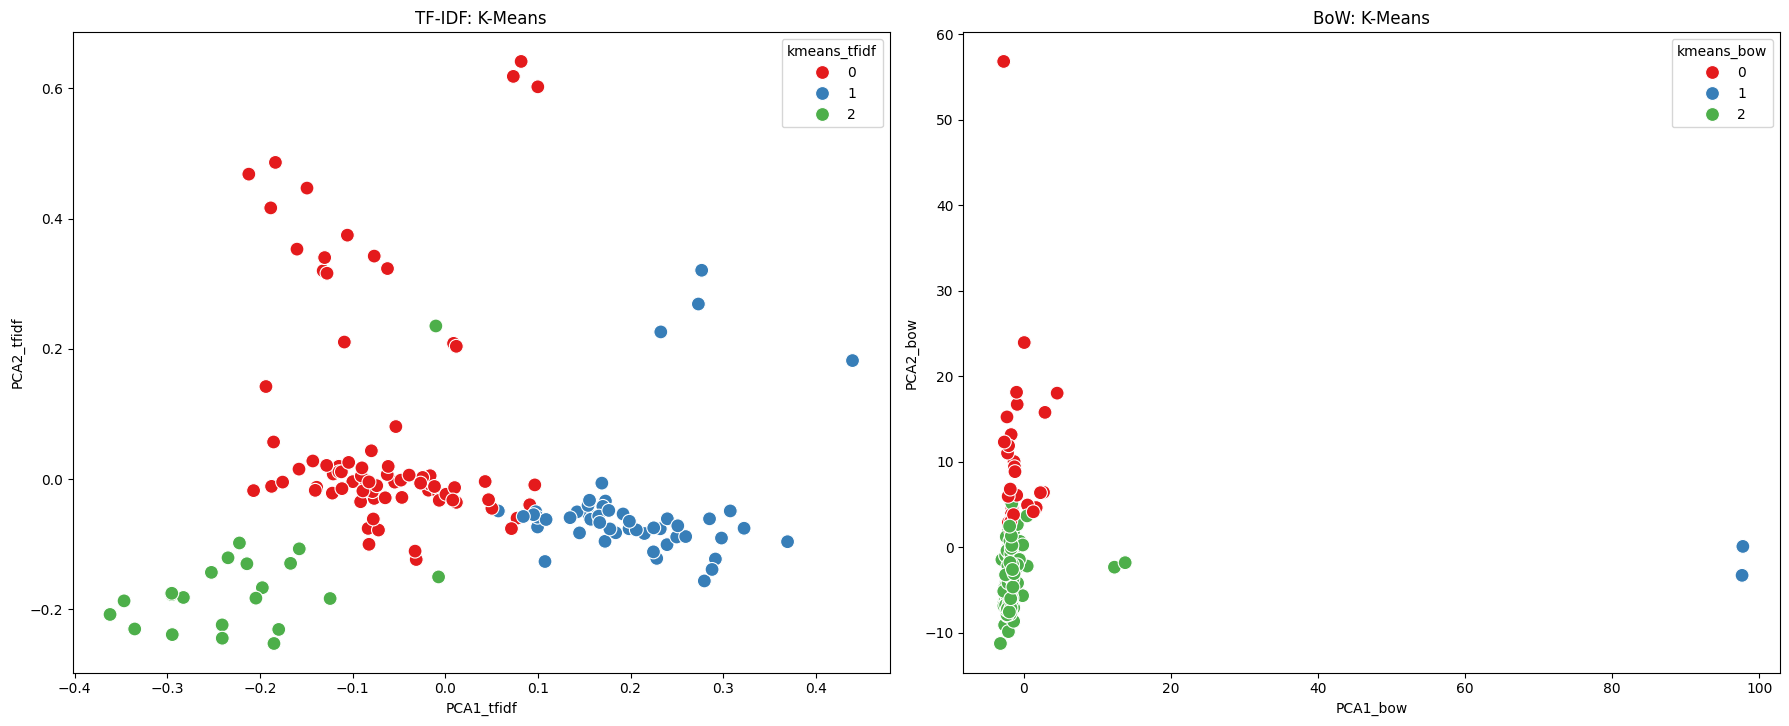

In [41]:
# K-Means Cluster
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(data=df_articles, x='PCA1_tfidf', y='PCA2_tfidf', hue='kmeans_tfidf', palette='Set1', s=100, ax=axes[0]).set_title('TF-IDF: K-Means')
sns.scatterplot(data=df_articles, x='PCA1_bow', y='PCA2_bow', hue='kmeans_bow', palette='Set1', s=100, ax=axes[1]).set_title('BoW: K-Means')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

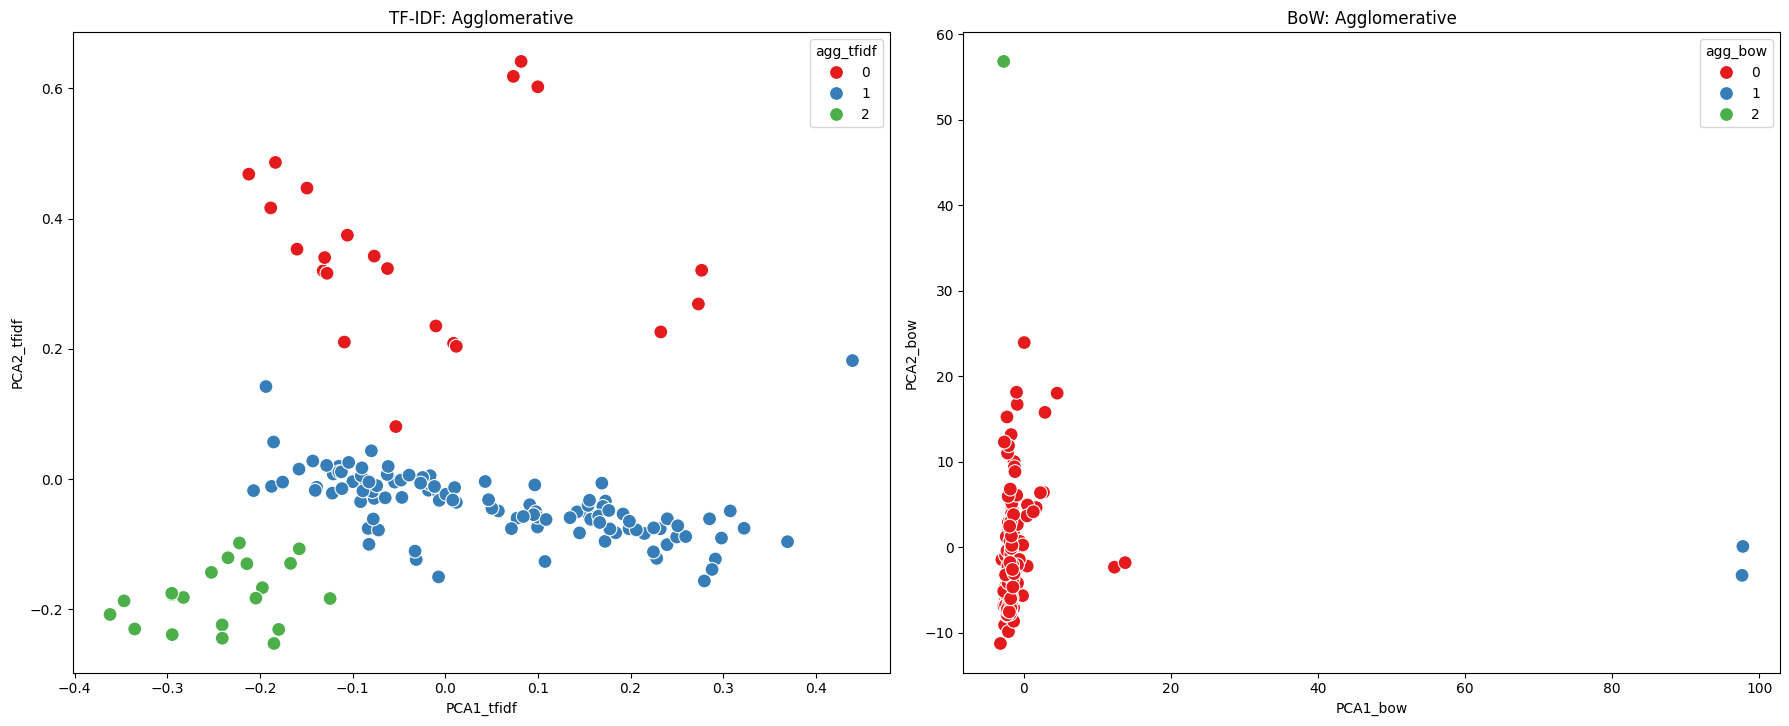

In [42]:
# Agglomerative Cluster
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(data=df_articles, x='PCA1_tfidf', y='PCA2_tfidf', hue='agg_tfidf', palette='Set1', s=100, ax=axes[0]).set_title('TF-IDF: Agglomerative')
sns.scatterplot(data=df_articles, x='PCA1_bow', y='PCA2_bow', hue='agg_bow', palette='Set1', s=100, ax=axes[1]).set_title('BoW: Agglomerative')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Cluster Size Distribution

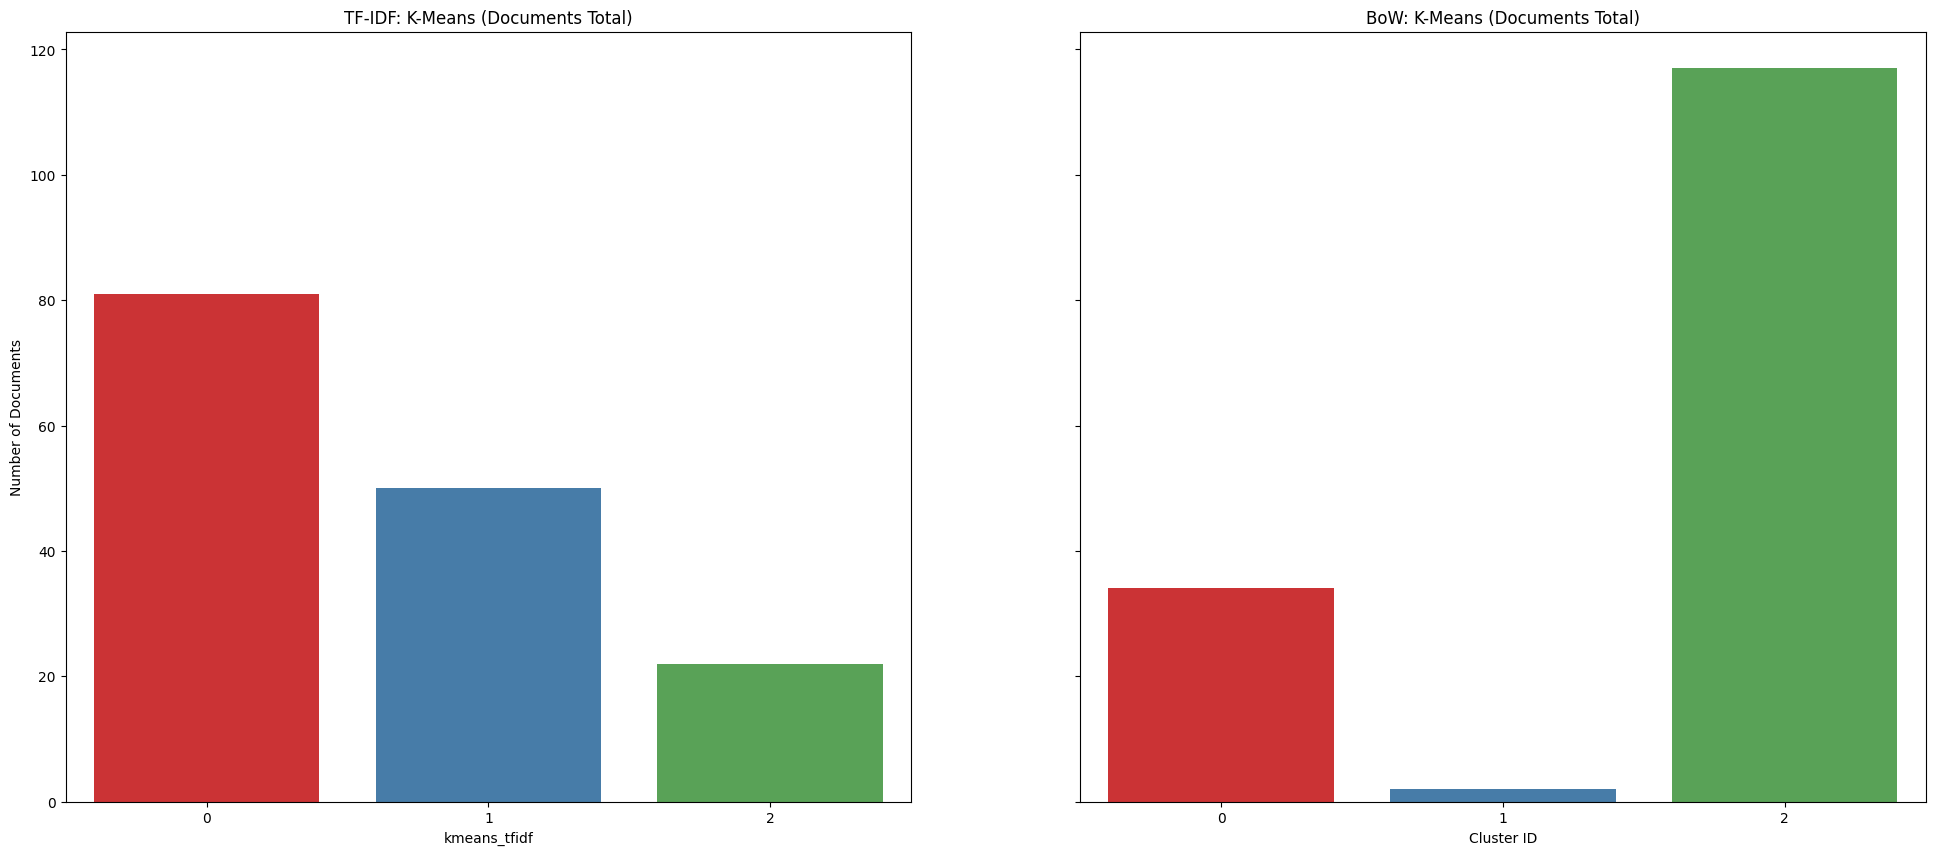

In [44]:
# K-Means TF-IDF
fig, axes = plt.subplots(1, 2, figsize=(24, 10), sharey=True)
counts = df_articles['kmeans_tfidf'].value_counts().sort_index()
sns.barplot(x=counts.index, y=counts.values, ax=axes[0], palette='Set1').set_title('TF-IDF: K-Means (Documents Total)')
axes[0].set_ylabel('Number of Documents')

# K-Means BoW
counts = df_articles['kmeans_bow'].value_counts().sort_index()
sns.barplot(x=counts.index, y=counts.values, ax=axes[1], palette='Set1').set_title('BoW: K-Means (Documents Total)')
axes[1].set_xlabel('Cluster ID')
axes[1].set_ylabel('Number of Documents')

plt.show()

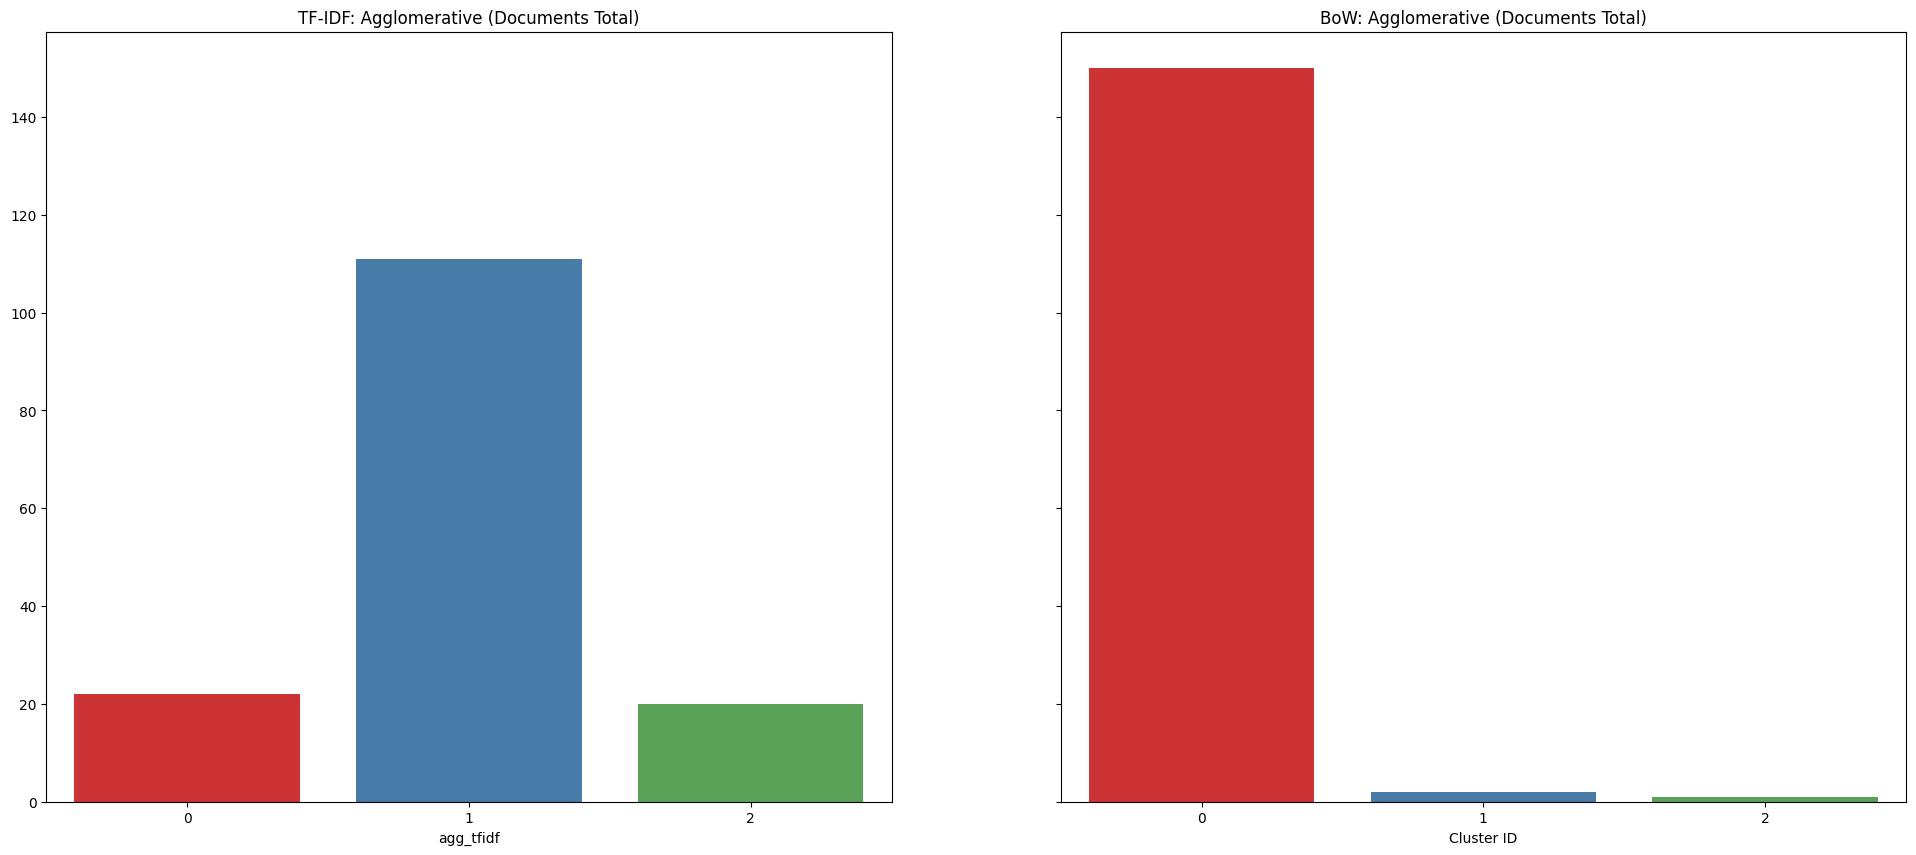

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10), sharey=True)

# Agglomerative TF-IDF
counts = df_articles['agg_tfidf'].value_counts().sort_index()
sns.barplot(x=counts.index, y=counts.values, ax=axes[0], palette='Set1').set_title('TF-IDF: Agglomerative (Documents Total)')

# Agglomerative BoW
counts = df_articles['agg_bow'].value_counts().sort_index()
sns.barplot(x=counts.index, y=counts.values, ax=axes[1], palette='Set1').set_title('BoW: Agglomerative (Documents Total)')
axes[1].set_xlabel('Cluster ID')

plt.show()

### K-Means Top Terms

In [46]:
def plot_top_terms_kmeans(model, feature_names, title, n_terms=10):
    fig, axes = plt.subplots(1, model.n_clusters, figsize=(16, 6))
    fig.suptitle(title, fontsize=16)
    cluster_centers = model.cluster_centers_

    for i in range(model.n_clusters):
        centroid_terms = cluster_centers[i].argsort()[::-1]
        top_terms = [feature_names[term_index] for term_index in centroid_terms[:n_terms]]
        top_scores = [cluster_centers[i][term_index] for term_index in centroid_terms[:n_terms]]
        
        df_terms = pd.DataFrame({'term': top_terms, 'score': top_scores})
        
        sns.barplot(x='score', y='term', data=df_terms.sort_values(by='score', ascending=False), ax=axes[i])
        axes[i].set_title(f'Cluster {i} Top Terms')
        axes[i].set_xlabel('Mean Score (TF-IDF or Frequency)')
        axes[i].set_ylabel('Term')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

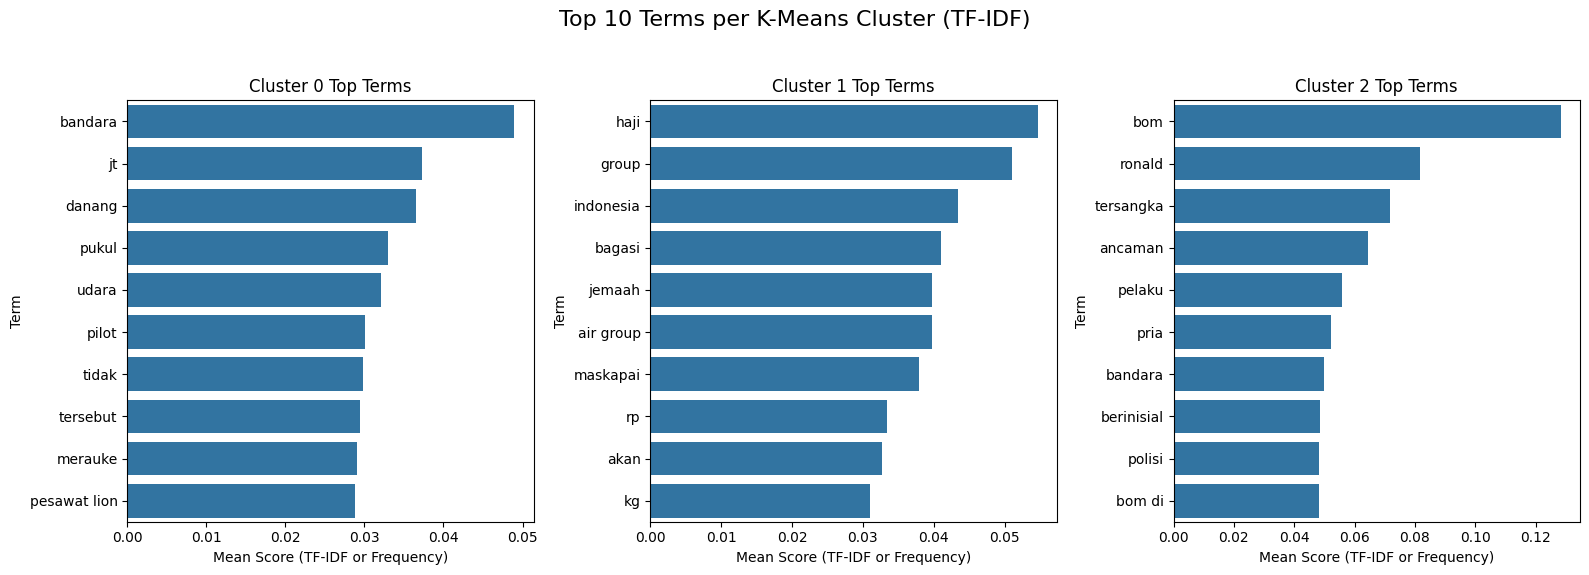

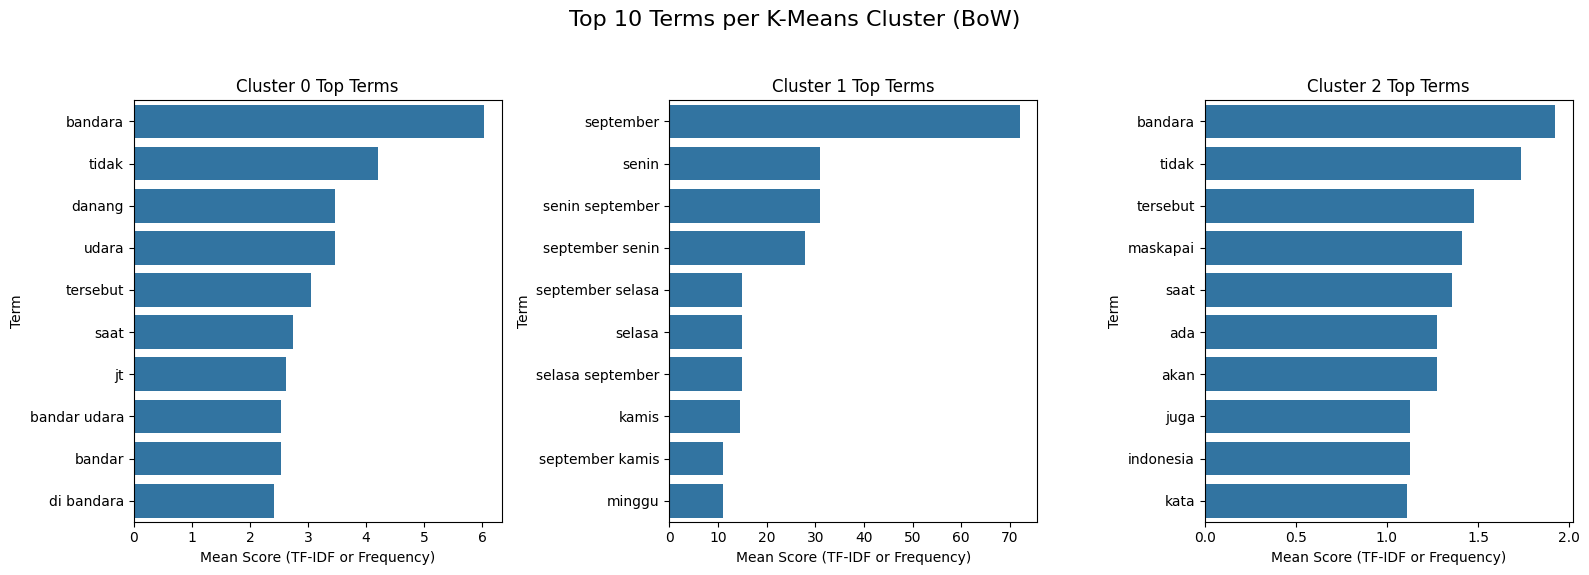

In [47]:
# Plot for TF-IDF K-Means
plot_top_terms_kmeans(kmeans_tfidf, tfidf_feature_names, 'Top 10 Terms per K-Means Cluster (TF-IDF)')

# Plot for BoW K-Means
plot_top_terms_kmeans(kmeans_bow, bow_feature_names, 'Top 10 Terms per K-Means Cluster (BoW)')

### Word Clouds per Cluster

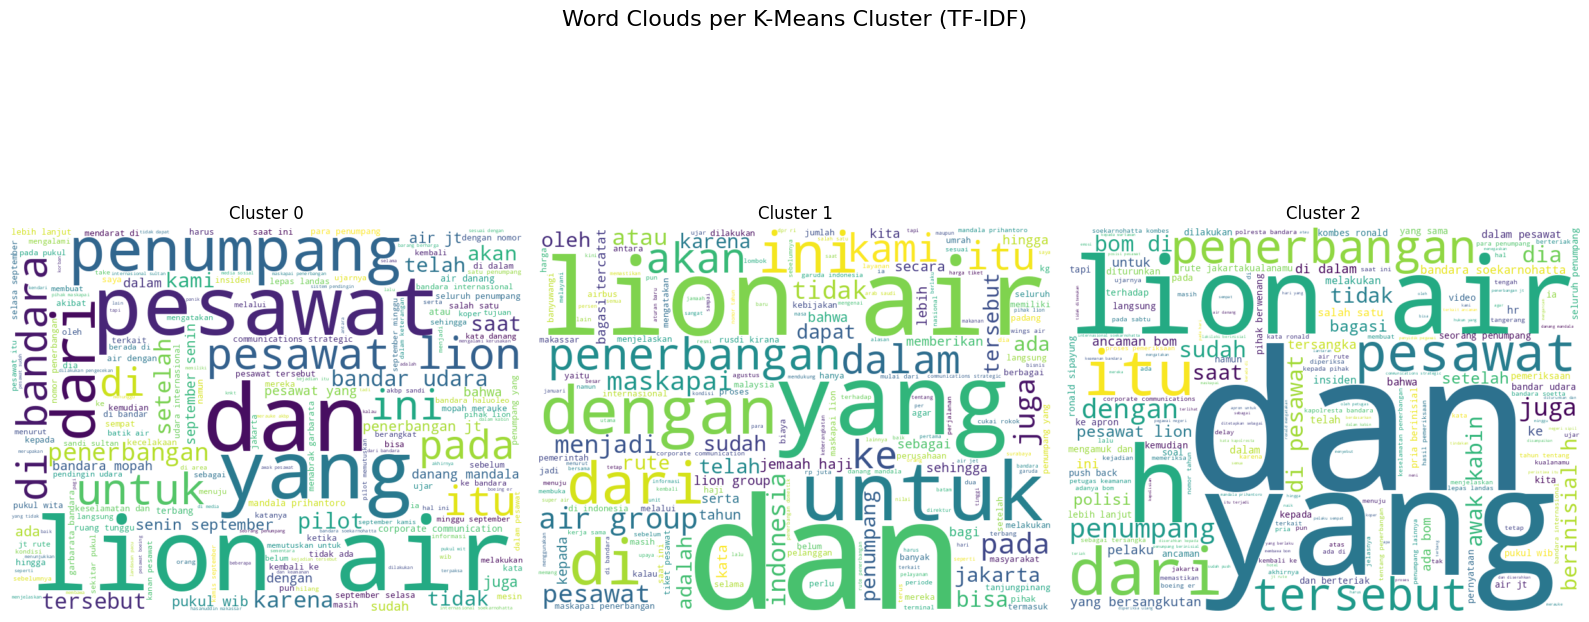

In [48]:
fig, axes = plt.subplots(1, num_clusters, figsize=(16, 8))
fig.suptitle('Word Clouds per K-Means Cluster (TF-IDF)', fontsize=16)

for i in range(num_clusters):
    cluster_text = ' '.join(df_articles[df_articles['kmeans_tfidf'] == i]['cleaned_article_text'])
    wordcloud = WordCloud(width=800, height=600, background_color='white', colormap='viridis').generate(cluster_text)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Cluster {i}')
    axes[i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Evaluation

In [52]:
print("\nK-Means (TF-IDF) vs. True Sentiment:")
print(pd.crosstab(df_articles['sentiment_label'], df_articles['kmeans_tfidf']))

print("\nAgglomerative (TF-IDF) vs. True Sentiment:")
print(pd.crosstab(df_articles['sentiment_label'], df_articles['agg_tfidf']))

print("\nK-Means (BoW) vs. True Sentiment:")
print(pd.crosstab(df_articles['sentiment_label'], df_articles['kmeans_bow']))

print("\nAgglomerative (BoW) vs. True Sentiment:")
print(pd.crosstab(df_articles['sentiment_label'], df_articles['agg_bow']))



K-Means (TF-IDF) vs. True Sentiment:
kmeans_tfidf      0   1   2
sentiment_label            
Negative         11   1   6
Netral           18   8  12
Positive         52  41   4

Agglomerative (TF-IDF) vs. True Sentiment:
agg_tfidf         0   1   2
sentiment_label            
Negative          1  11   6
Netral            4  24  10
Positive         17  76   4

K-Means (BoW) vs. True Sentiment:
kmeans_bow        0  1   2
sentiment_label           
Negative          4  0  14
Netral            8  0  30
Positive         22  2  73

Agglomerative (BoW) vs. True Sentiment:
agg_bow           0  1  2
sentiment_label          
Negative         18  0  0
Netral           38  0  0
Positive         94  2  1


In [49]:

silhouette_tfidf_agglomerative = silhouette_score(tfidf_mat, agglomerative_cluster_labels)
calinski_harabasz_tfidf_agglomerative = calinski_harabasz_score(tfidf_dense, agglomerative_cluster_labels)
davies_bouldin_tfidf_agglomerative = davies_bouldin_score(tfidf_dense, agglomerative_cluster_labels)


print(f'TF-IDF Kmeans Clustering Performance:\nSilhouette Score: {silhouette_tfidf_kmeans}\nCalinski-Harabasz Score: {calinski_harabasz_tfidf_kmeans}\nDavies-Bouldin Score: {davies_bouldin_tfidf_kmeans}\n')
print(f'TF-IDF Agglomerative Clustering Performance:\nSilhouette Score: {silhouette_tfidf_agglomerative}\nCalinski-Harabasz Score: {calinski_harabasz_tfidf_agglomerative}\nDavies-Bouldin Score: {davies_bouldin_tfidf_agglomerative}\n')

TF-IDF Kmeans Clustering Performance:
Silhouette Score: 0.023743169997377144
Calinski-Harabasz Score: 3.961060195806458
Davies-Bouldin Score: 5.136185996803626

TF-IDF Agglomerative Clustering Performance:
Silhouette Score: 0.00017211898322912227
Calinski-Harabasz Score: 1.5330827496865698
Davies-Bouldin Score: 1.0790061054879376



In [50]:
silhouette_bow_agglomerative = silhouette_score(X_bow, agglomerative_cluster_labels)
calinski_harabasz_bow_agglomerative = calinski_harabasz_score(X_bow_dense, agglomerative_cluster_labels)
davies_bouldin_bow_agglomerative = davies_bouldin_score(X_bow_dense, agglomerative_cluster_labels)


print(f'BoW Kmeans Clustering Performance:\nSilhouette Score: {silhouette_bow_kmeans}\nCalinski-Harabasz Score: {calinski_harabasz_bow_kmeans}\nDavies-Bouldin Score: {davies_bouldin_bow_kmeans}\n')
print(f'BoW Agglomerative Clustering Performance:\nSilhouette Score: {silhouette_bow_agglomerative}\nCalinski-Harabasz Score: {calinski_harabasz_bow_agglomerative}\nDavies-Bouldin Score: {davies_bouldin_bow_agglomerative}\n')


BoW Kmeans Clustering Performance:
Silhouette Score: 0.14664531175538198
Calinski-Harabasz Score: 15.137710184725044
Davies-Bouldin Score: 2.9136953402560875

BoW Agglomerative Clustering Performance:
Silhouette Score: 0.5213313502317253
Calinski-Harabasz Score: 15.481891862438308
Davies-Bouldin Score: 0.4014368969452793



   Feature Type  Silhouette Score  Calinski-Harabasz Score  \
0        TF-IDF          0.000172                 1.533083   
1  Bag of Words          0.521331                15.481892   

   Davies-Bouldin Score  
0              1.079006  
1              0.401437  


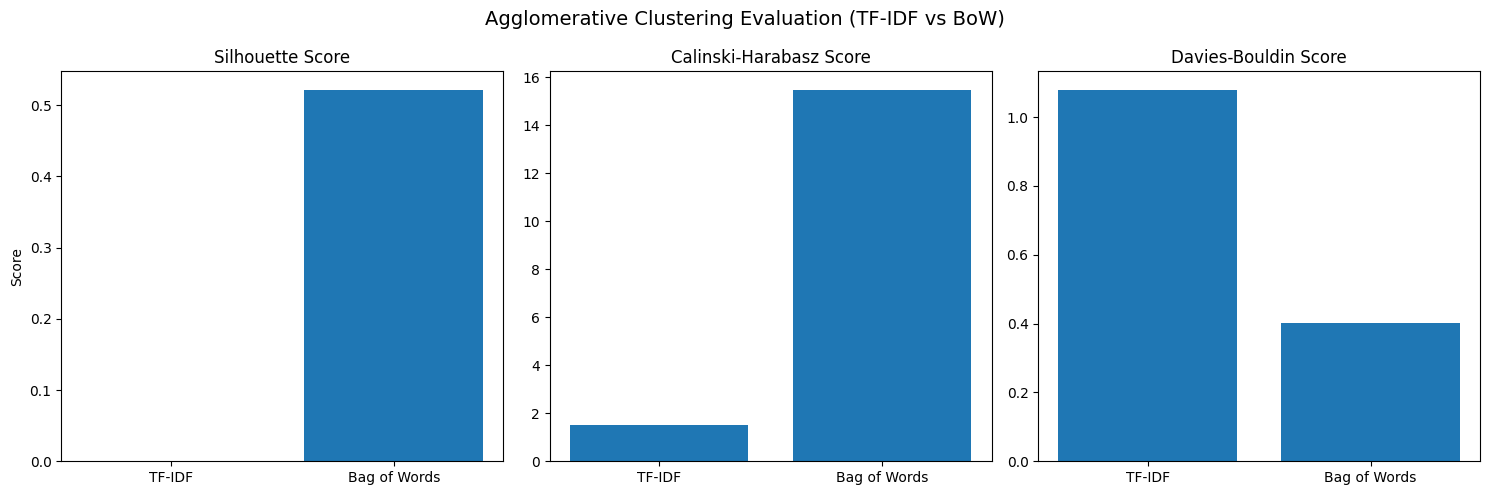

In [53]:
data = {
    'Feature Type': ['TF-IDF', 'Bag of Words'],
    'Silhouette Score': [silhouette_tfidf_agglomerative, silhouette_bow_agglomerative],
    'Calinski-Harabasz Score': [calinski_harabasz_tfidf_agglomerative, calinski_harabasz_bow_agglomerative],
    'Davies-Bouldin Score': [davies_bouldin_tfidf_agglomerative, davies_bouldin_bow_agglomerative]
}

df_scores = pd.DataFrame(data)
print(df_scores)

# --- Visualization ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Silhouette
axes[0].bar(df_scores['Feature Type'], df_scores['Silhouette Score'])
axes[0].set_title('Silhouette Score')
axes[0].set_ylabel('Score')

# Calinski-Harabasz
axes[1].bar(df_scores['Feature Type'], df_scores['Calinski-Harabasz Score'])
axes[1].set_title('Calinski-Harabasz Score')

# Davies-Bouldin (lower is better)
axes[2].bar(df_scores['Feature Type'], df_scores['Davies-Bouldin Score'])
axes[2].set_title('Davies-Bouldin Score')

plt.suptitle('Agglomerative Clustering Evaluation (TF-IDF vs BoW)', fontsize=14)
plt.tight_layout()
plt.show()